### Visualization : Assignment 2 

In [111]:
#Useful packages 
import matplotlib.pyplot as plt
from scipy.io import wavfile
import subprocess
import os
from scipy import signal
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from scipy.fftpack import fft
import pandas as pd
COLORS = ['#7DFB6D', '#C7B815', '#D4752E', '#C7583F','#d64161', '#86af49', '#c1946a',
          '#92a8d1','#563f46', '#96897f', '#7e4a35', '#c1502e','#587e76', '#87bdd8',
          '#D4752E','#c83349','#7DFB6D', '#C7B815', '#622569']

### Convert MP3 files to WAV files: 

In [90]:
# get all mp3 files names 
mp3_files = []
for root, dirs, files in os.walk("../ALL BIRDS"):  
    for filename in files:
        mp3_files.append(filename)
#Convert files
# for i in range (len(mp3_files)) : 
#     subprocess.call(['ffmpeg', '-i', mp3_files[i],'../ALL BIRDS/wavFiles/'+str(mp3_files[i].replace("mp3","wav"))])

### Visualize a sound file as a signal
we choose to visualize a random sound file

In [112]:
#read audio file, visualise as a signal 
train_audio_path ='../ALL BIRDS/wavFiles/'
filename = 'Rose-Crested-Blue-Pipit-364567.wav'
samples,sample_rate = librosa.load(str(train_audio_path) + filename)

In [109]:
# Define a function that calculates spectrogram.
# Note, that we are taking logarithm of spectrogram values. It will make our plot much more clear 


def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  
    return xf, vals


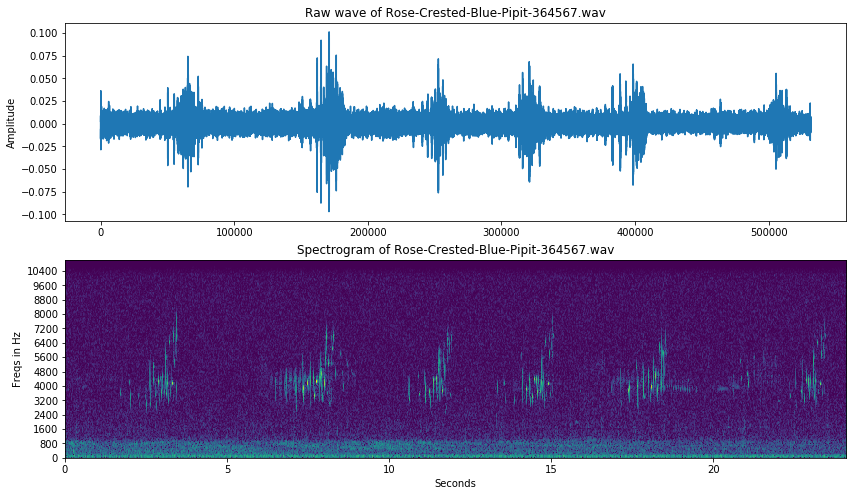

In [17]:

# Let's plot it:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
# ax2.set_xticks(times[::200])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
plt.show()

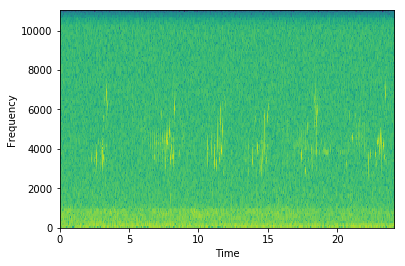

In [172]:
plt.specgram(samples,Fs=sample_rate)

plt.xlabel('Time')

plt.ylabel('Frequency')
plt.show()

In [152]:
#normalize samples
# mean = np.mean(spectrogram, axis=0)
# std = np.std(spectrogram, axis=0)
# spectrogram = (spectrogram - mean) / std

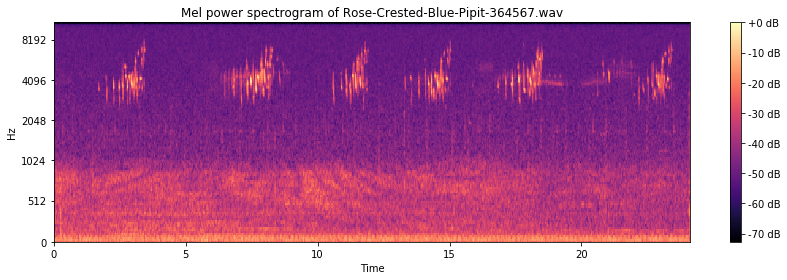

In [173]:
#ou can calculate Mel power spectrogram and MFCC using for example librosa python package.
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram of ' + filename)
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

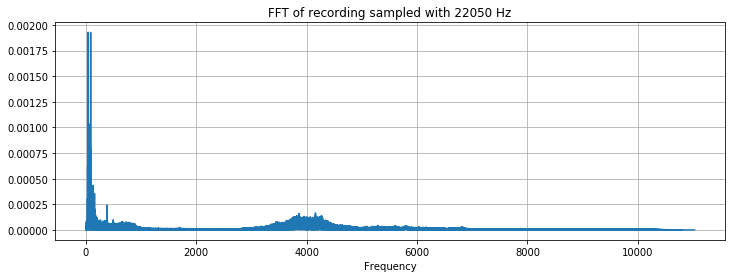

In [10]:

xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

### Visualize multiple audio signals and their 2D spectrograms to facilitate visual inspection and comparison

In [113]:
df=pd.read_csv('AllBirdsv4.csv')
names= pd.unique(df.English_name)

In [114]:
# Map birds names 
dict_name = {}
file_names= ["Rose-Crested-Blue-Pipit-","Blue-collared-Zipper-", "Bombadil-", "Broad-winged-Jojo-",
           "Canadian-Cootamum-", "Carries-Champagne-Pipit-", "Darkwing-Sparrow-","Eastern-Corn-Skeet-",
           "Green-Tipped-Scarlet-Pipit-","Lesser-Birchbeere-","Orange-Pine-Plover-" ,"Ordinary-Snape-", 
           "Pinkfinch-" ,  "Purple-Tooting-Tout-" ,"Qax-" ,"Queenscoat-" ,"Bent-Beak-Riffraff-","Scrawny-Jay-",
           "Vermillion-Trillian-"]
for i in range(19): 
    dict_name[names[i]]=file_names[i]

In [115]:
# select 19 representatives of the birds species, meaning that from each specie we are going to choose one audio sound to visualize
birds_names = df.English_name.unique()
representatives_birds= []

aux = df["English_name"][1]
representatives_birds.append(dict_name[aux]+str(df["File ID"][1])+".wav")

j = 1
for i in range(2,df.shape[0]):
    if (df["English_name"][i] != aux and df["Quality"][i]=="A" ):
        aux = df["English_name"][i]
        representatives_birds.append(dict_name[aux]+str(df["File ID"][i])+".wav")
        j += 1
    if (j == 19): 
        break

In [116]:
# loas files 
train_audio_path ='../ALL BIRDS/wavFiles/'
samples_=[]
rates_=[]
for i in range(19):
    samples,sample_rate = librosa.load(str(train_audio_path) +representatives_birds[i])
    samples_.append(samples)
    rates_.append(sample_rate)

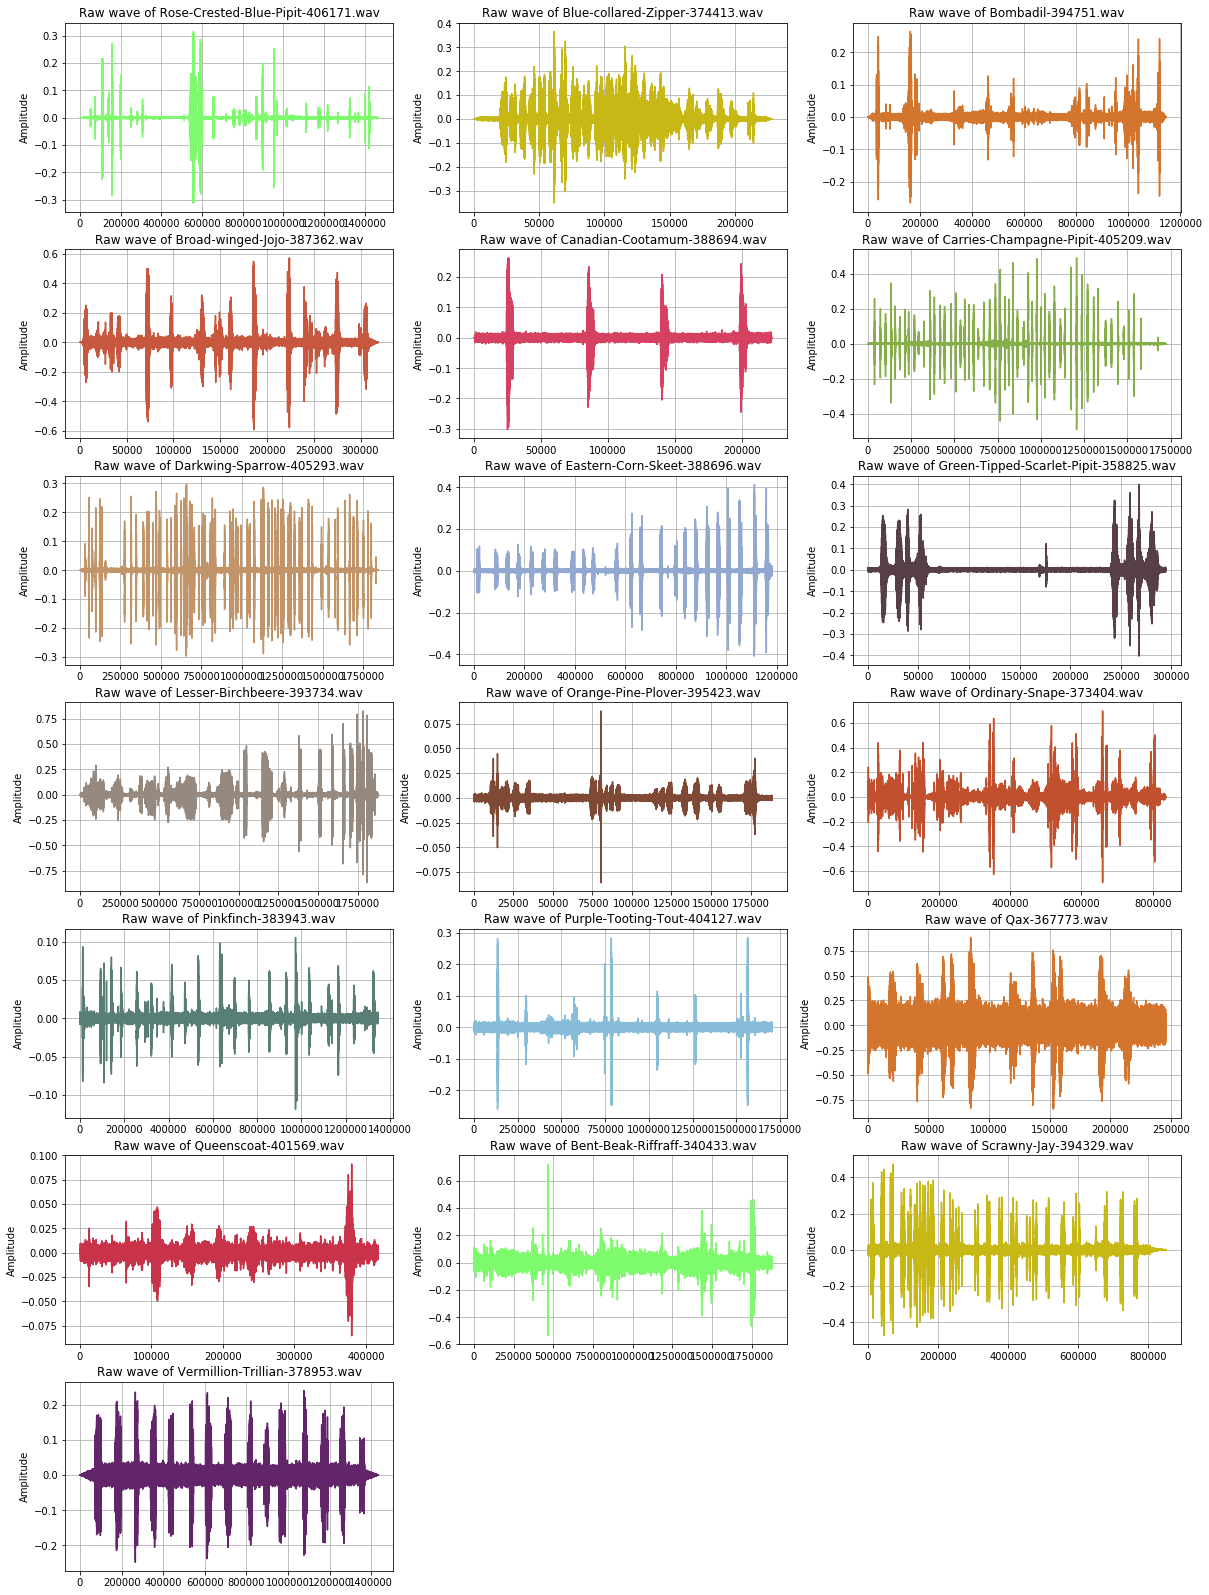

In [117]:
#waveplots 
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(top = 1.2)
colors=['b','g','r','c','m','y','k']

for i in range(19): 
    
    ax1 = fig.add_subplot(7,3,i+1)
    ax1.set_title('Raw wave of ' + representatives_birds[i])
    ax1.set_ylabel('Amplitude')
    ax1.plot(samples_[i], color=COLORS[i])
    plt.grid()
plt.show()   

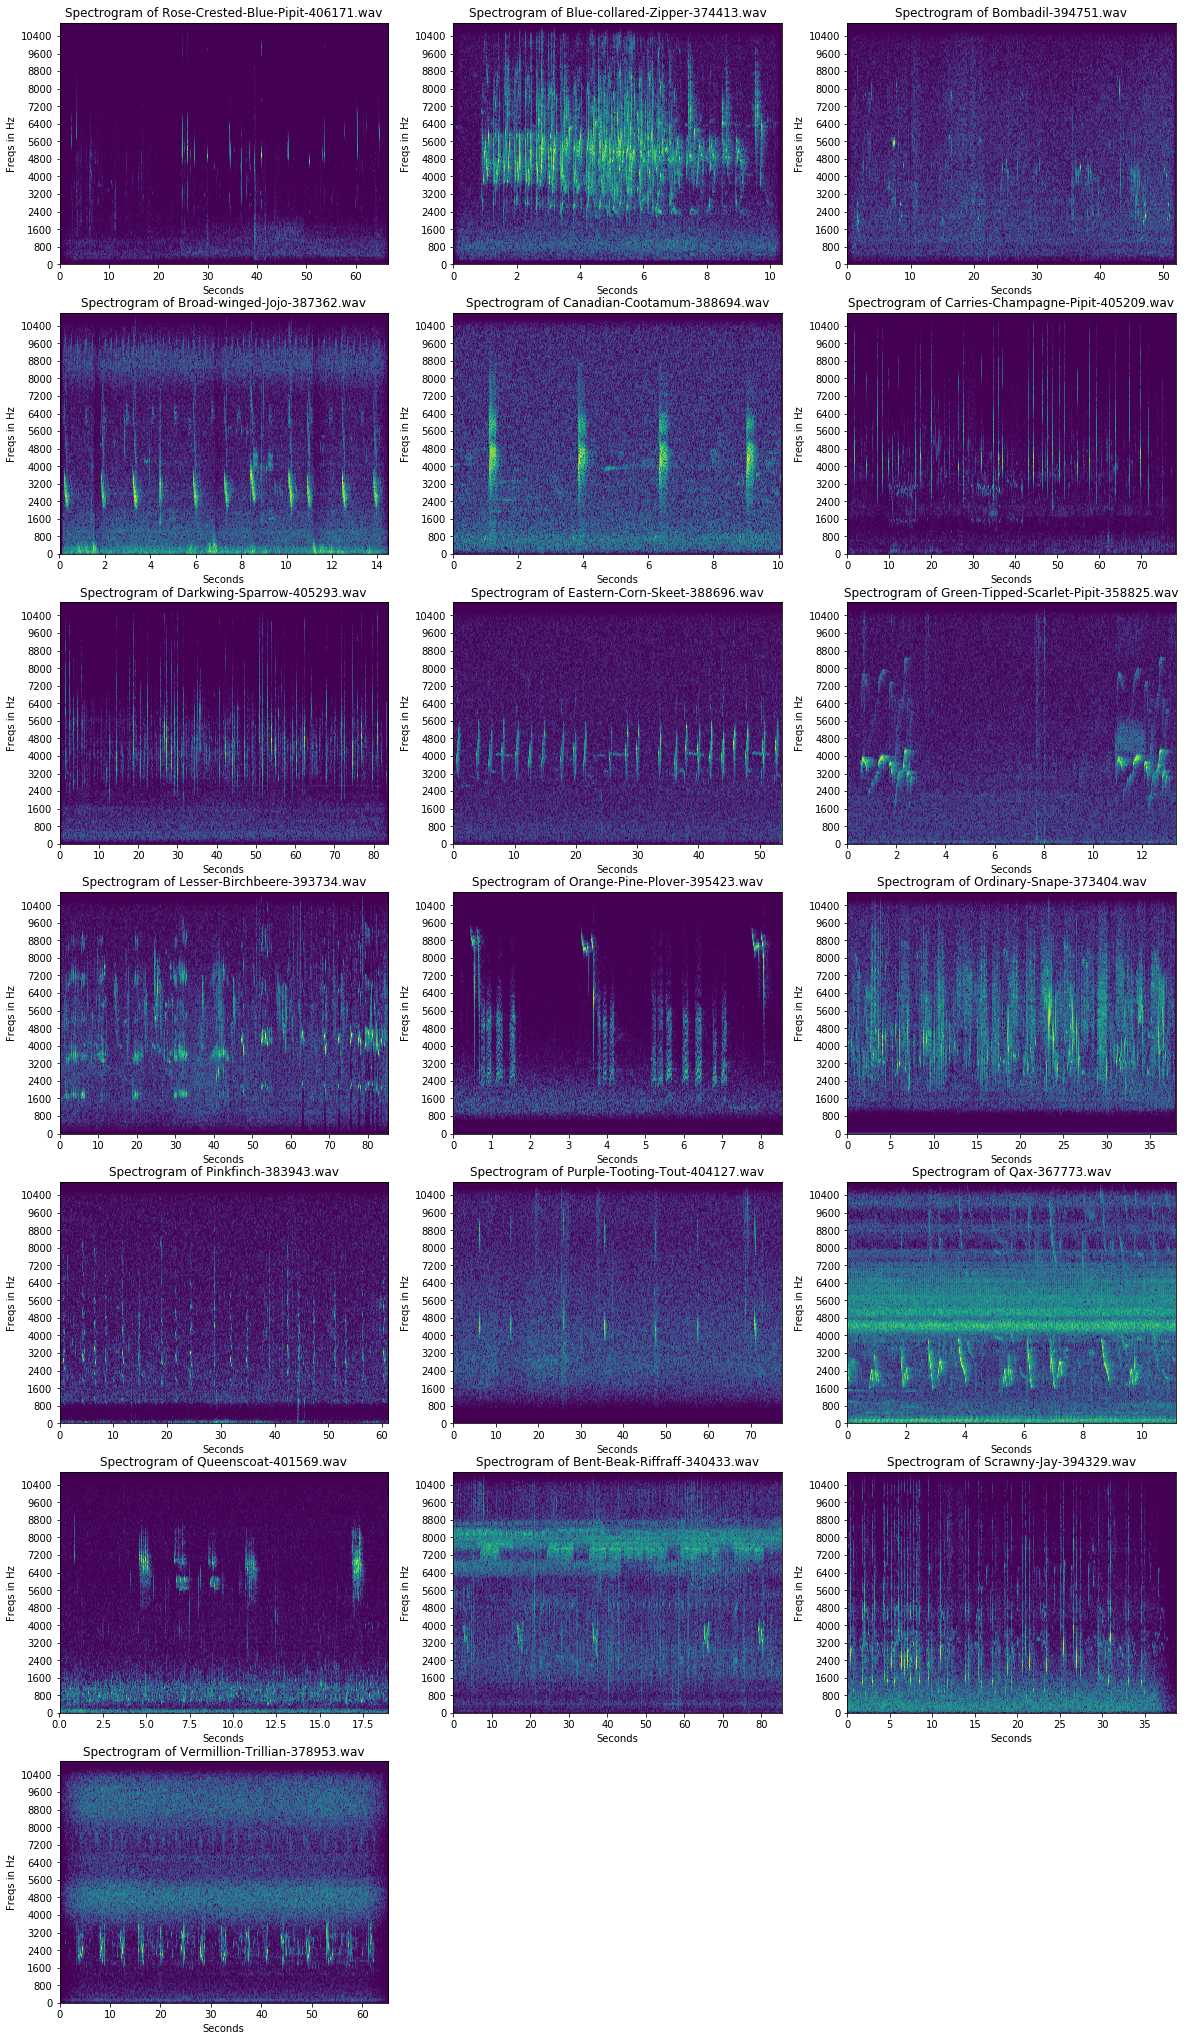

In [38]:
# 2D spectrogram for each representative
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(top = 1.5)
for i in range(19):
    freqs, times, spectrogram = log_specgram(samples_[i], rates_[i])
    ax2 = fig.add_subplot(7,3,i+1)
    ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax2.set_yticks(freqs[::16])
    #ax2.set_xticks(times[::400])
    ax2.set_title('Spectrogram of ' + representatives_birds[i])
    ax2.set_ylabel('Freqs in Hz')
    ax2.set_xlabel('Seconds')
plt.show()

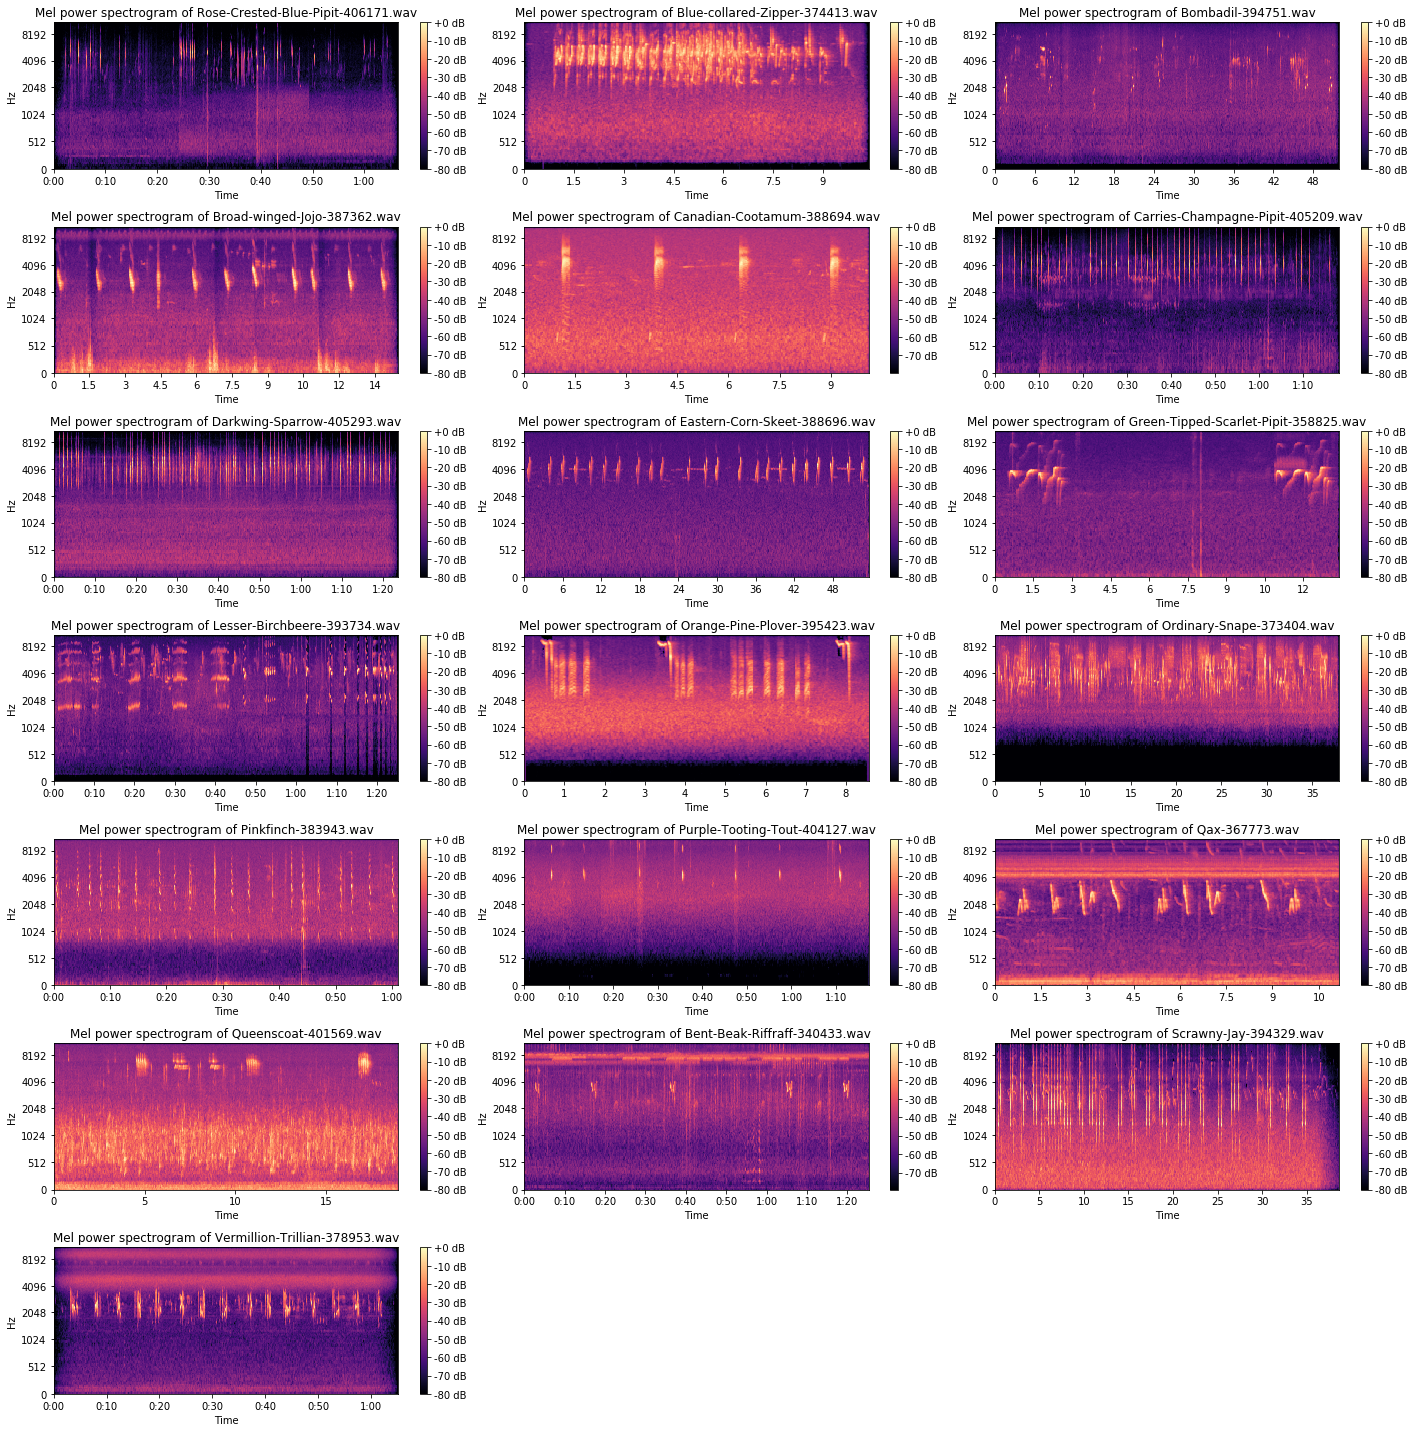

In [41]:
# 2D Mel-spectrogram for each representative
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(top = 1.2)
for i in range(19):

    S = librosa.feature.melspectrogram(samples_[i], sr=rates_[i], n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    ax2 = fig.add_subplot(7,3,i+1)
    librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
    ax2.set_title('Mel power spectrogram of ' + representatives_birds[i])
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
plt.show()

<div class= "alert alert-info">
**Comments:**   
- 19 training birds were chosen (one from each species of the birds) and their waveplots, spectrograms and mel-spectrograms were plotted. The choice of the representatives of the birds was not random, we selected samples having an A score as they have a better quality and less noise.       
<br>
- We notice that there are some characteristics that distinguish one species from another like for example: frequencies of the songs, amplitudes and silence intervals.   
<br>
- That's when we had the idea of taking a closer look at some  Blue pipits audios in order to compare them with Kasios sound files, just to have an idea, before the prediction phase, whether it is really about blue pipit as claimed Kasios or not. 
</div>


## Test recordings inspection : 

### Visualize Blue pipits songs and calls : 

In [118]:
bp_song=df[(df.Quality== "A") & (df.English_name == "Rose-crested Blue Pipit" ) &(df.Vocalization_type == "song")]
bp_call=df[(df.Quality== "A") & (df.English_name == "Rose-crested Blue Pipit" ) &(df.Vocalization_type == "call")]

#### Blue pipits Song : waveplot and FFT : 

In [119]:
idxs = bp_song["File ID"][9:12]
song =[dict_name["Rose-crested Blue Pipit"]+str(idx)+".wav" for idx in idxs]
train_audio_path ='../ALL BIRDS/wavFiles/'
samples_=[]
rates_=[]
for i in range(3):
    samples,sample_rate = librosa.load(str(train_audio_path) +song[i])
    samples_.append(samples)
    rates_.append(sample_rate)

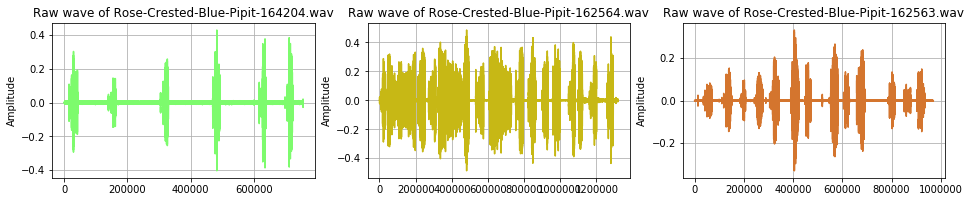

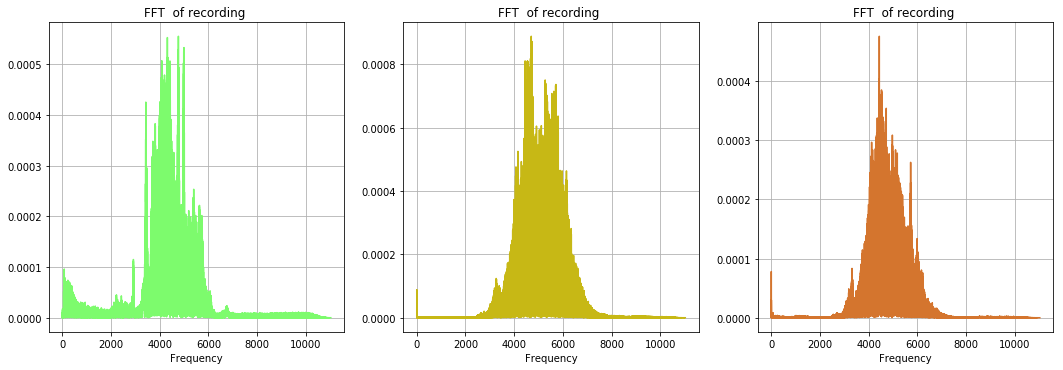

In [121]:
fig = plt.figure(figsize=(16, 2))
plt.subplots_adjust(top = 1.2)
colors=['b','g','r','c','m','y','k']

for i in range(3): 
    
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.set_title('Raw wave of ' + song[i])
    ax1.set_ylabel('Amplitude')
    ax1.plot(samples_[i], color=COLORS[i])
    plt.grid()
plt.show()  

fig = plt.figure(figsize=(18, 4))
plt.subplots_adjust(top = 1.2)

for i in range(3): 
    xf, vals = custom_fft(samples_[i], rates_[i])
    
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.set_title('FFT  of recording ')
    ax1.set_xlabel('Frequency')
    ax1.plot(xf, vals,color=COLORS[i])
    plt.grid()
plt.show() 

#### Blue pipits calls : waveplot and FFT : 

In [122]:
idxs = bp_call["File ID"][9:12]
call =[dict_name["Rose-crested Blue Pipit"]+str(idx)+".wav" for idx in idxs]
train_audio_path ='../ALL BIRDS/wavFiles/'
samples_=[]
rates_=[]
for i in range(3):
    samples,sample_rate = librosa.load(str(train_audio_path) +call[i])
    samples_.append(samples)
    rates_.append(sample_rate)

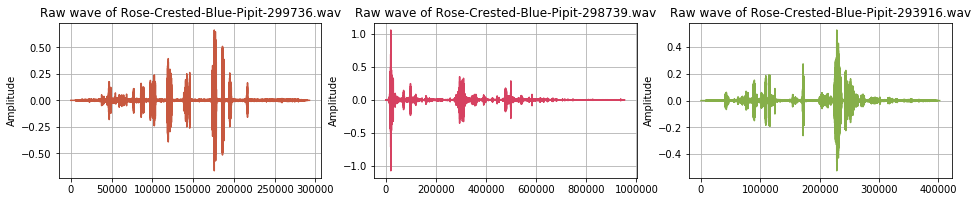

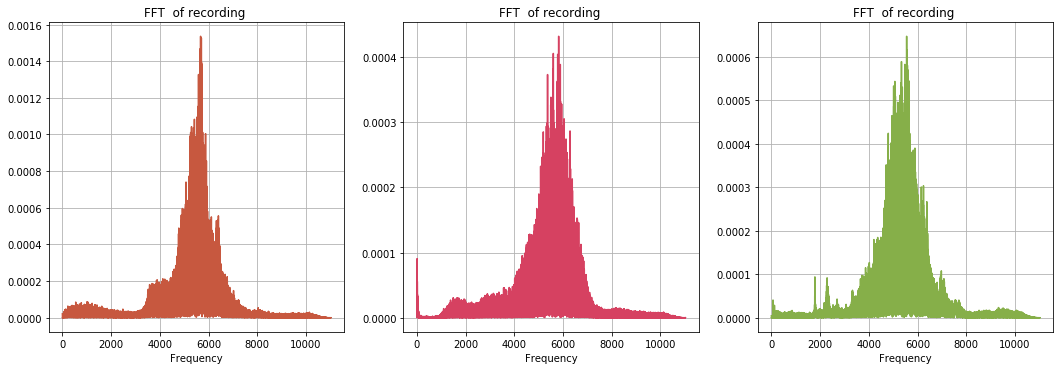

In [123]:
fig = plt.figure(figsize=(16, 2))
plt.subplots_adjust(top = 1.2)
colors=['b','g','r','c','m','y','k']

for i in range(3): 
    
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.set_title('Raw wave of ' + call[i])
    ax1.set_ylabel('Amplitude')
    ax1.plot(samples_[i], color=COLORS[i+3])
    plt.grid()
plt.show()  

fig = plt.figure(figsize=(18, 4))
plt.subplots_adjust(top = 1.2)

for i in range(3): 
    xf, vals = custom_fft(samples_[i], rates_[i])
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.set_title('FFT  of recording ')
    ax1.set_xlabel('Frequency')
    ax1.plot(xf, vals, '-',color=COLORS[i+3])
    plt.grid()
plt.show() 

<div class= "alert alert-info">
**Comments:**   
- We notice that, for both Blue pipits songs and calls, frequencies always lie around 5kHz. This gives us an idea how the test recordings plots shall behave if they are true blue pipits. 
</div>


#### Test recordings waveplots and FFT : 

In [124]:
path_test = '../ALL BIRDS/TestBirdsfromKasios/'
audio_test= []
for root, dirs, files in os.walk(path_test):  
    for filename in files:
        audio_test.append(filename)

In [14]:
#Convert mp3 test files to wav files

# for i in range (len(audio_test)) : 
#     subprocess.call(['ffmpeg', '-i', path_test+audio_test[i],path_test+str(audio_test[i].replace("mp3","wav"))])


In [125]:

samples_test=[]
rates_test=[]
for i in range(15):
    samples,sample_rate = librosa.load(path_test +audio_test[i])
    samples_test.append(samples)
    rates_test.append(sample_rate)

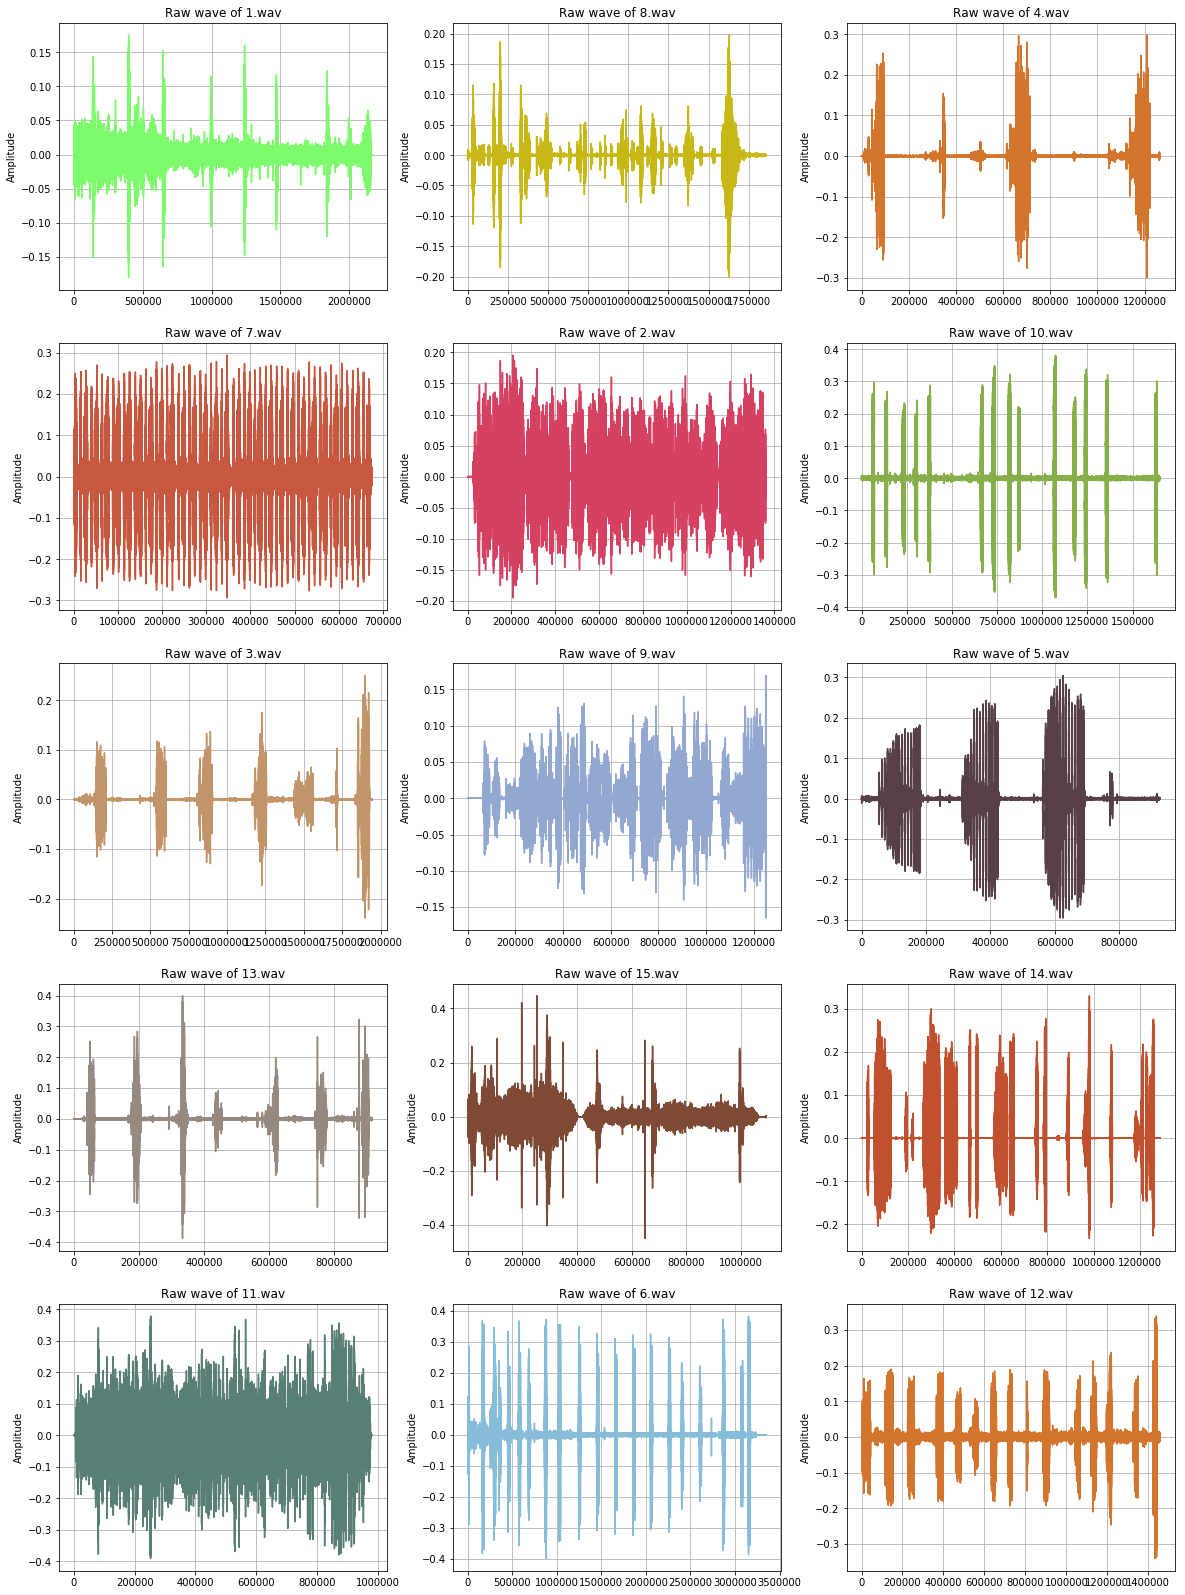

In [126]:
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(top = 1.2)
colors=['b','g','r','c','m','y','k']

for i in range(15): 
    
    ax1 = fig.add_subplot(5,3,i+1)
    ax1.set_title('Raw wave of ' + audio_test[i])
    ax1.set_ylabel('Amplitude')
    ax1.plot(samples_test[i], color=COLORS[i])
    plt.grid()
plt.show() 

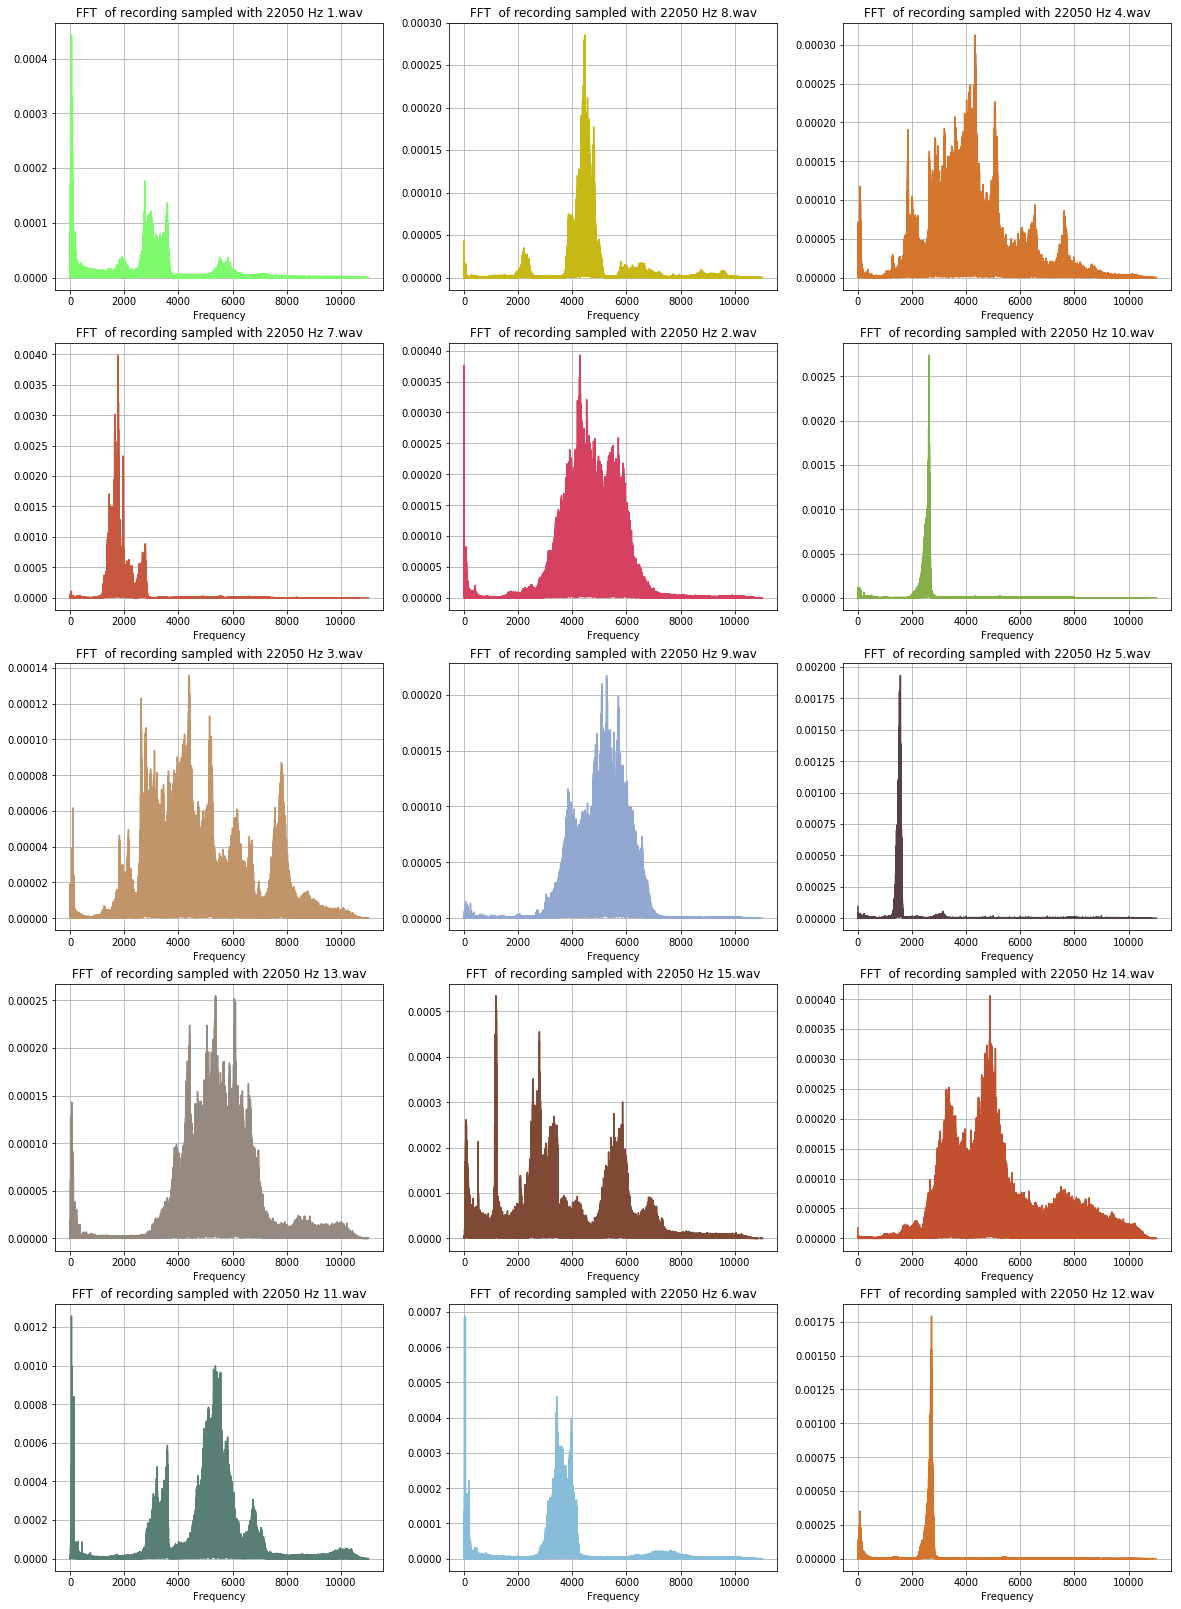

In [127]:
# Fast Fourier Transform graph 
# FFT is simmetrical, so we take just the first half
# FFT is also complex, so we take just the real part (abs)
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(top = 1.2)
colors=['b','g','r','c','m','y','k']

for i in range(15): 
    xf, vals = custom_fft(samples_test[i], rates_test[i])
    ax1 = fig.add_subplot(5,3,i+1)
    ax1.set_title('FFT  of recording sampled with ' + str(rates_test[i]) + ' Hz '+str(audio_test[i]))
    ax1.set_xlabel('Frequency')
    ax1.plot(xf, vals,color=COLORS[i])
    plt.grid()
plt.show() 

<div class= "alert alert-info">
**Comments:**   

- We notice that a minimum of half the test recordings have frequencies, shapes and amplitudes very different from the real blue pipits that we visualized above. Which leads us to strongly doubt the reassurances of kasios that there are plenty of Rose-crested Blue Pipits happily living and nesting in the Preserve. 
</div>


## Brief conclusion before the prediction phase : 

<div class="alert alert-info">
- Based on the findings and evidence gathered, it is evident that the dumping region was a favorite spot for the Rose-crested Blue Pipits, probably a spot where abundant food or necessary shelter was available for this certain species. But, recently, we noticed that their numbers decreased significantly in the preserve, as they migrated southward.   

- According to the analysis done previously:  

1. There is a significant increase in the birds' calls compared to their songs which is a sign of distress and a cry for help, as we mentioned before.  

2. The comparaison between the real Rose-crested Blue Pipits audio files and the ones provided by Kasios as a proof of their "innocence" is clearly suggesting that there is a remarkable difference in terms of frenquencies, amplitudes and even shapes of the waveplots and FFT plots.    

-This leads us to suspect that Kasios provided recordings of other species and claimed that they're Rose-crested Blue Pipits.

</div>

### Collect a list of methods to classify bird sound from the literature:

<strong><font color="red"> Some Audio Preprocessing methods we found useful: </font></strong>  

<strong>Mel-frequency cepstral coefficients</strong>  
The Mel-frequency cepstrum (MFC) is a representation of the short-term power
spectrum of a sound, based on a linear cosine transform of a log power spectrum on
a nonlinear mel scale of frequency. In MFC, the frequency bands are equally spaced
on the mel scale, which approximates the human auditory system’s response more
closely than the linearly-spaced frequency bands used in the normal cepstrum.
Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively
make up an MFC. They are derived from a type of cepstral representation of the
audio clip (a nonlinear ”spectrum-of-a-spectrum”)[7]. We used Librosa library to
extract MFCCs coefficients of each audio file of dataset.  

<strong>Chromagram : </strong>  
Chroma-based features, which are also referred to pitch class profiles, are a powerful
tool for analyzing music whose pitches can be meaningfully categorized (often into
twelve categories) and whose tuning approximates to the equal-tempered scale.
Given a music representation (e.g. a musical score or an audio recording), the main
2idea of chroma features is to aggregate for a given local time window (e.g. specified
in beats or in seconds) all information that relates to a given chroma into a single
coefficient. Shifting the time window across the music representation results in a
sequence of chroma features each expressing how the representation’s pitch content
within the time window is spread over the twelve chroma bands. The resulting
time-chroma representation is also referred to as chromagram[3]. We used Librosa
library to compute a chromagram from a power spectrogram of a audio file.  

<strong>Melspectrogram : </strong>  
Melspectrogram is the spectrogram of a waveform computed on mel-scale. The mel
scale is a perceptual scale of pitches judged by listeners to be equal in distance from
one another. The name mel comes from the word melody to indicate that the scale
is based on pitch comparisons.  

<strong> <font color="red"> Some classification methods from literature </font> </strong> 

-KNN and SVM: Chosen due to their widespread use and ease of interpretation .  

-CNNs and LSTMs: have been shown to perform well for
various image recognition tasks. Audio recordings can be mapped to spectrograms,
and hence image classification literature is relevant in this task


********************

<strong>Materials and methods : </strong>  
• Choice of features (MFCCs, Mel spectra, or learned features) and their summarisation over time (mean and standard deviation, maximum, or modulation coefficients).  
• Whether or not to apply noise reduction to audio spectra as a pre-processing step.  
• Decision windowing: whether to treat the full-length audio as a single unit for training/testing purposes, or whether to divide it into shorter-duration windows (1, 5 or 60 s).  
• How to produce an overall decision when using decision windowing (via the mean or the maximum of the probabilities).  
• Classifier configuration.




### find some visual features that can be highlighted in the visualization to help understand the most important features for discriminating bird sounds